<a href="https://colab.research.google.com/github/SreeeelakshmiChandran/EV-Market-Segmentation-Report/blob/main/EV_Market_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Electric_car_data.csv to Electric_car_data.csv
Saving EV_Stats.csv to EV_Stats.csv
Saving Indian_automobile_behavior.csv to Indian_automobile_behavior.csv


In [30]:
df1=pd.read_csv("EV_Stats.csv")
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


In [32]:
df2= pd.read_csv("Electric_car_data.csv")
df2.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [33]:
df3= pd.read_csv("Indian_automobile_behavior.csv")
df3.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [34]:
print('DF1 Shape:', df1.shape)
print('DF2 Shape:', df2.shape)
print('DF3 Shape:', df3.shape)

DF1 Shape: (30, 10)
DF2 Shape: (103, 14)
DF3 Shape: (99, 13)


In [35]:
print('<<< Dataset 1---------------------------------------------------')
print(df1.info())
print('<<< Dataset 2---------------------------------------------------')
print(df2.info())
print('<<< Dataset 3---------------------------------------------------')
print(df3.info())

<<< Dataset 1---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                   

In [36]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('<<< Dataset 1 >>>', d1 , '<<< Dataset 2 >>>', d2, '<<< Dataset 3 >>>' , d3)

'<<< Dataset 1 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


'<<< Dataset 2 >>>'

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


'<<< Dataset 3 >>>'

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [37]:
df1.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [38]:
df2.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [39]:
df3.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [40]:
df1.duplicated().sum()

0

In [41]:
df2.duplicated().sum()

0

In [42]:
df3.duplicated().sum()

0

# Dataset 1 Analysis

In [43]:
df1.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')

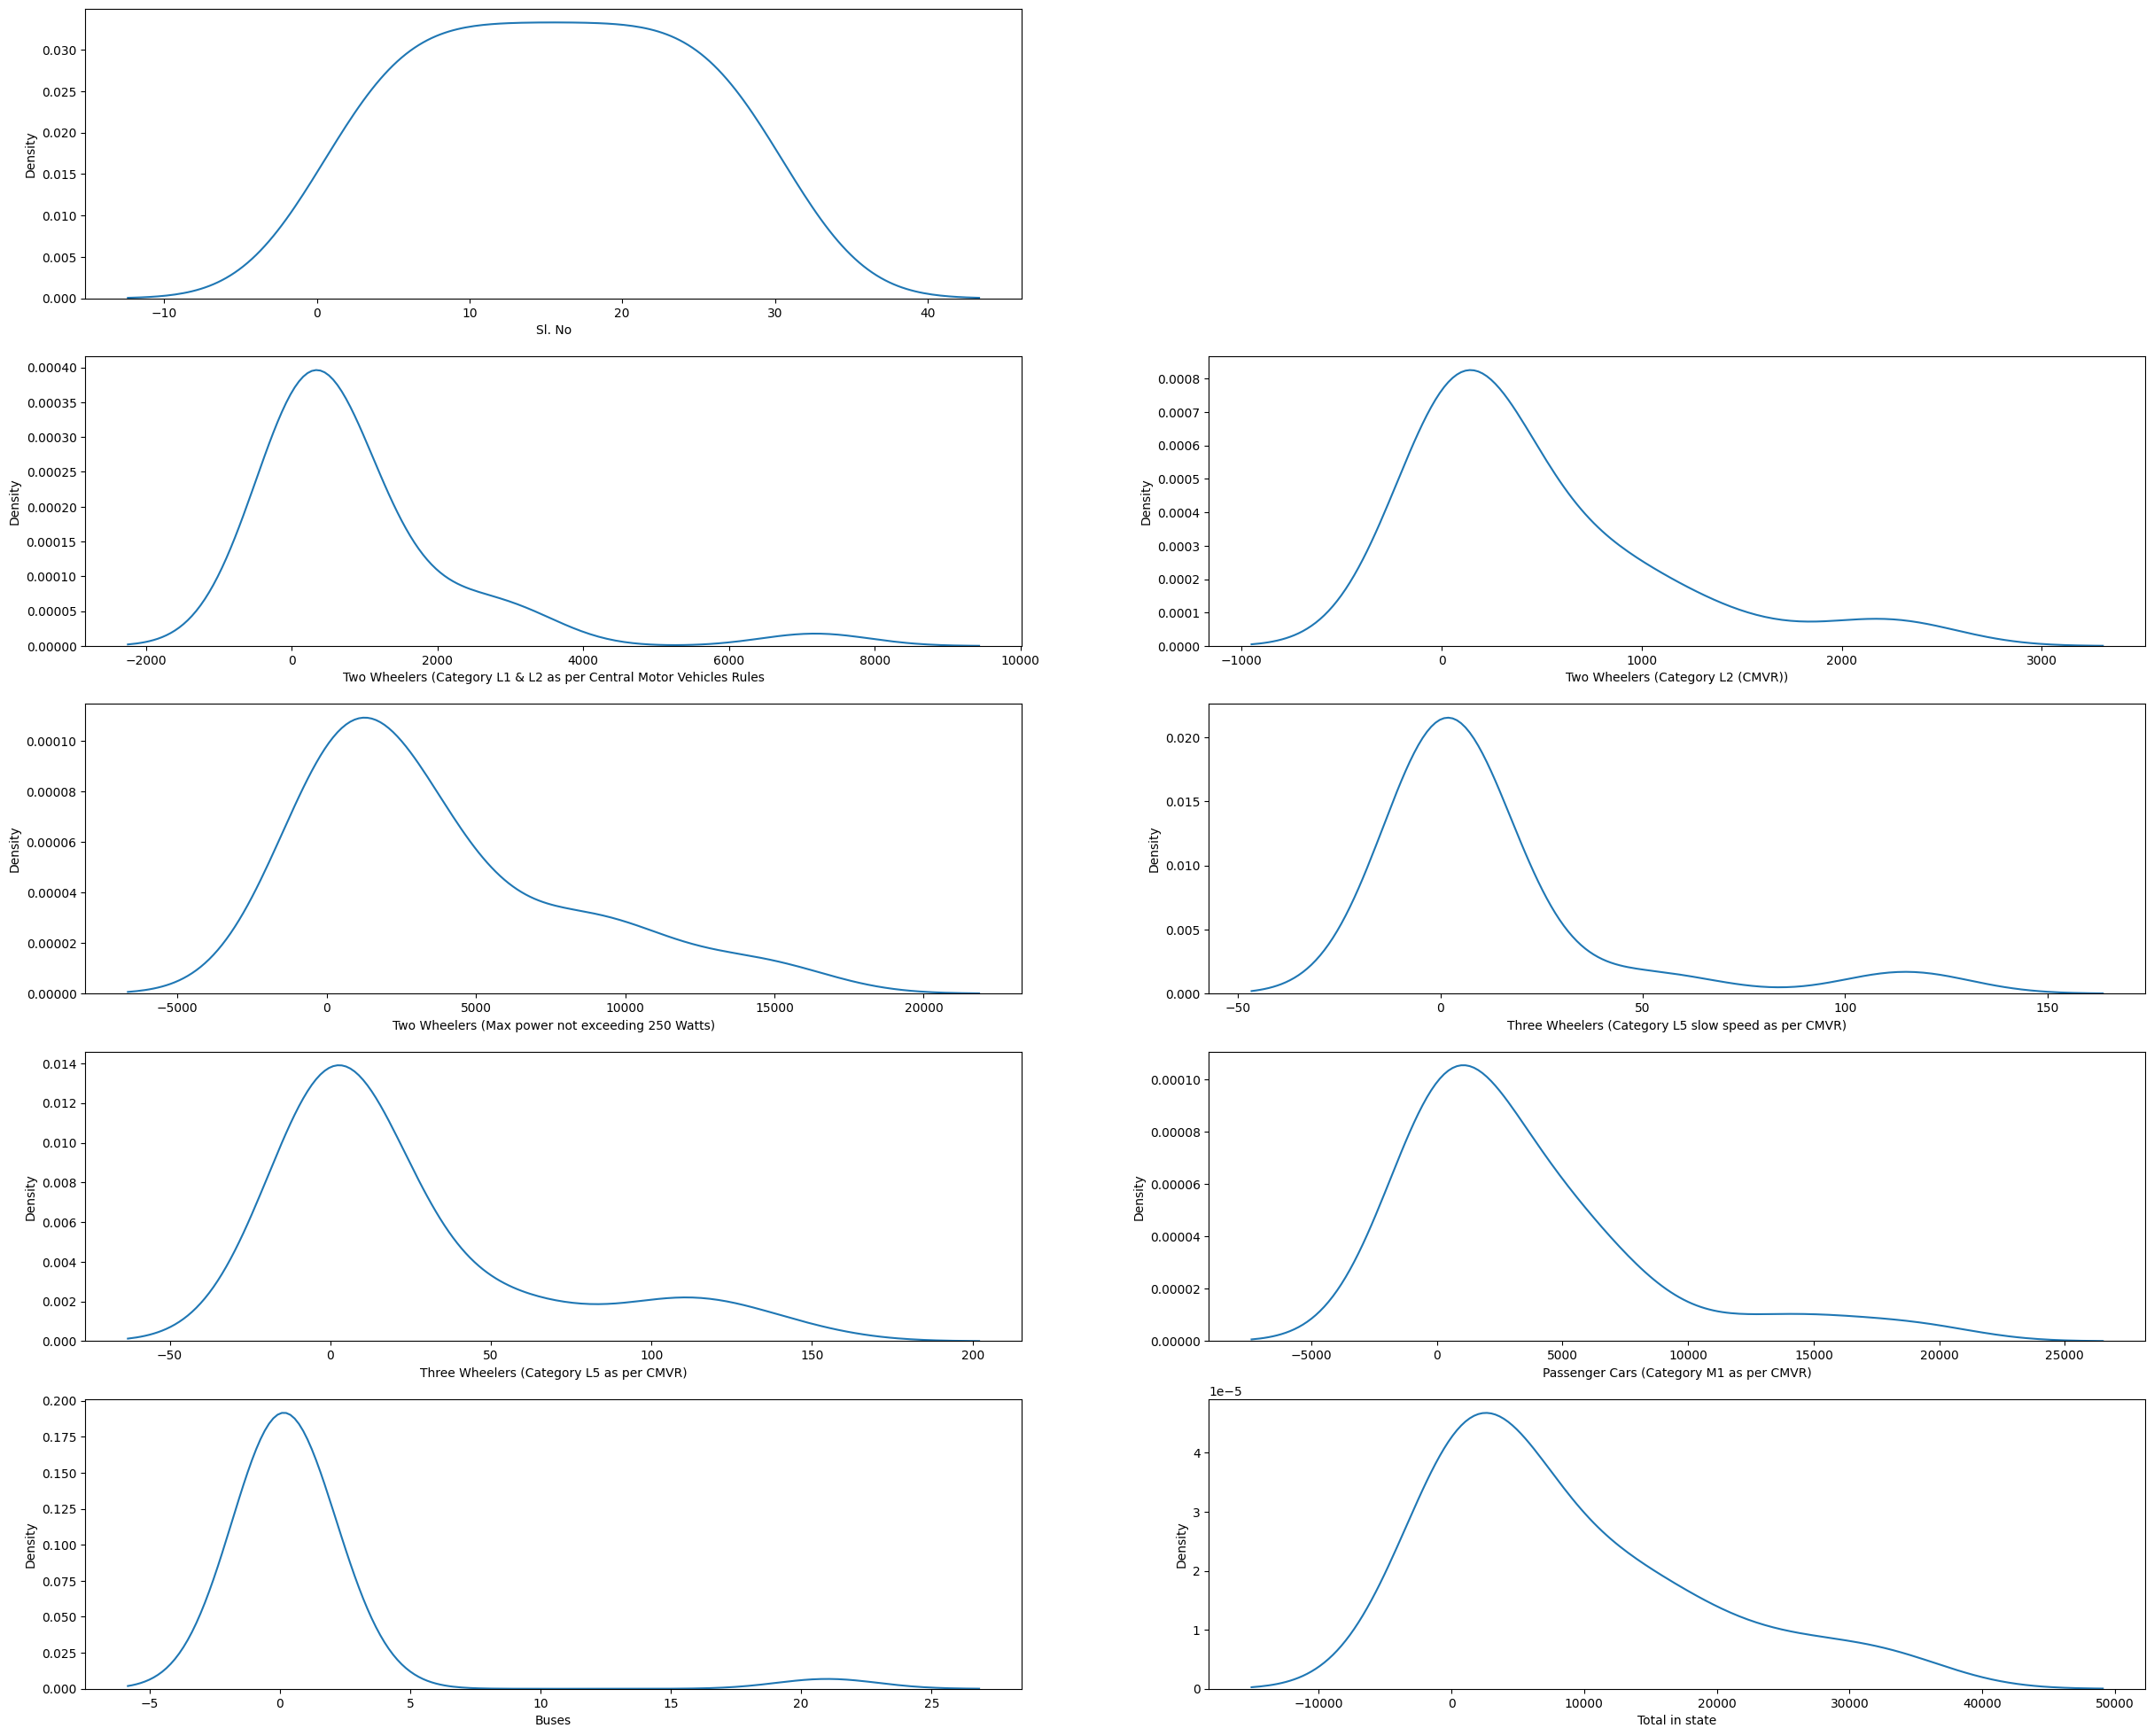

In [44]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df1.columns):
    if df1[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df1[col], ax=ax)
        plt.xlabel(col)

plt.show()

# Analysis of 2-Wheeler EVs

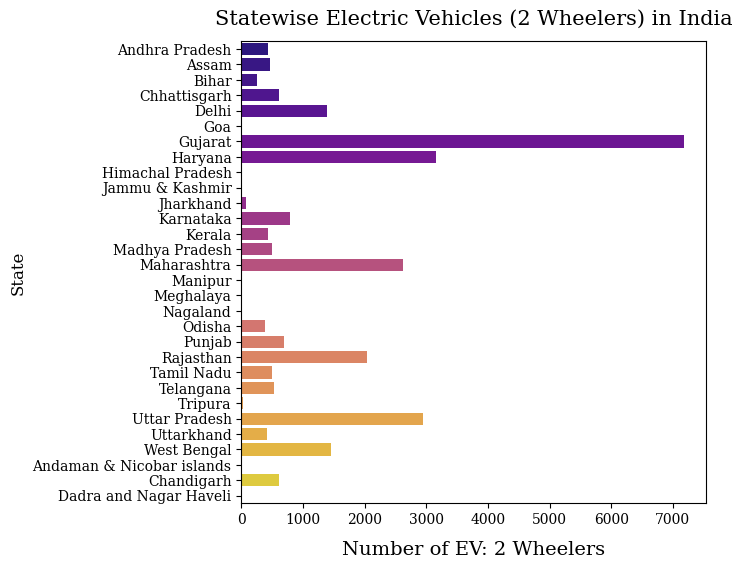

In [45]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='plasma')
plt.ylabel('State', fontsize=12, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

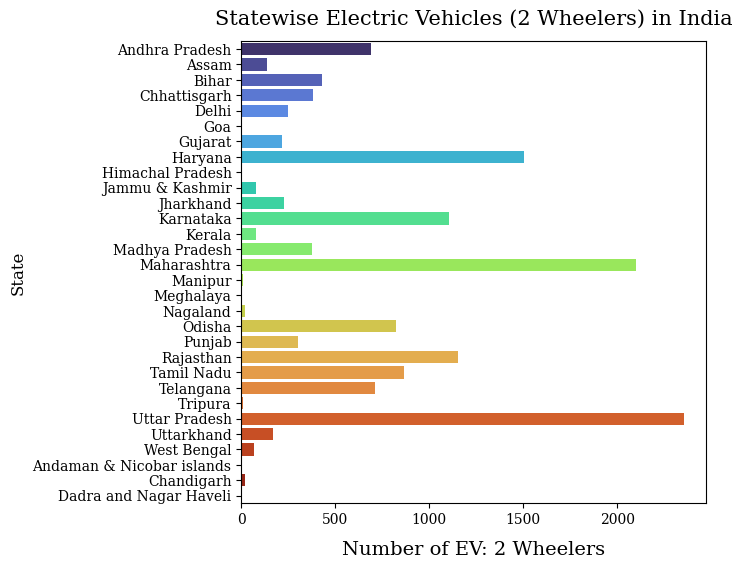

In [46]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L2 (CMVR))', palette='turbo')
plt.ylabel('State', fontsize=12, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

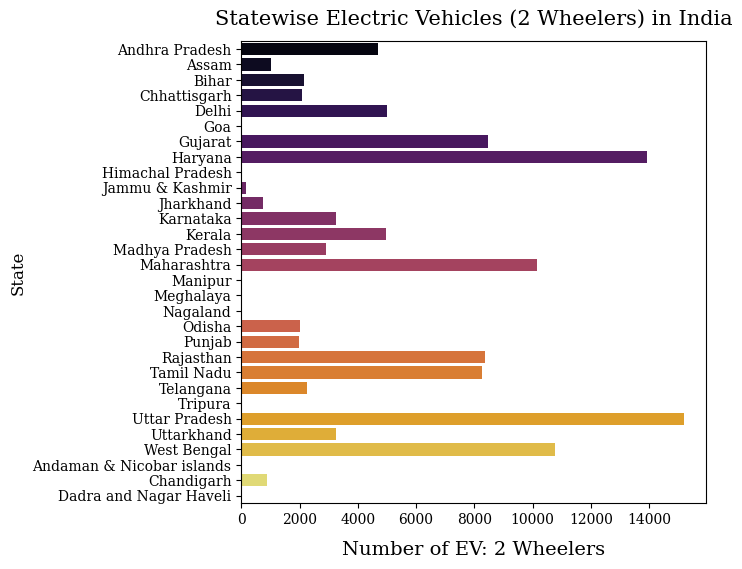

In [47]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Max power not exceeding 250 Watts)', palette='inferno')
plt.ylabel('State', fontsize=12, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis of 3-Wheeler EVs

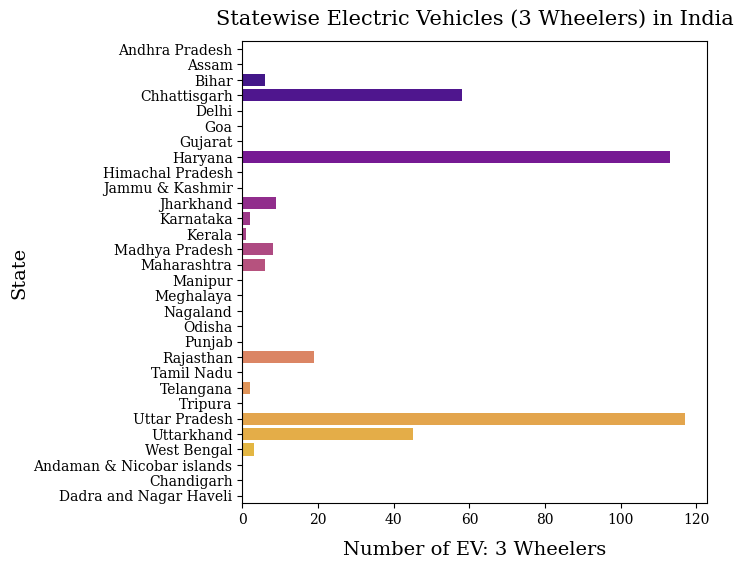

In [48]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

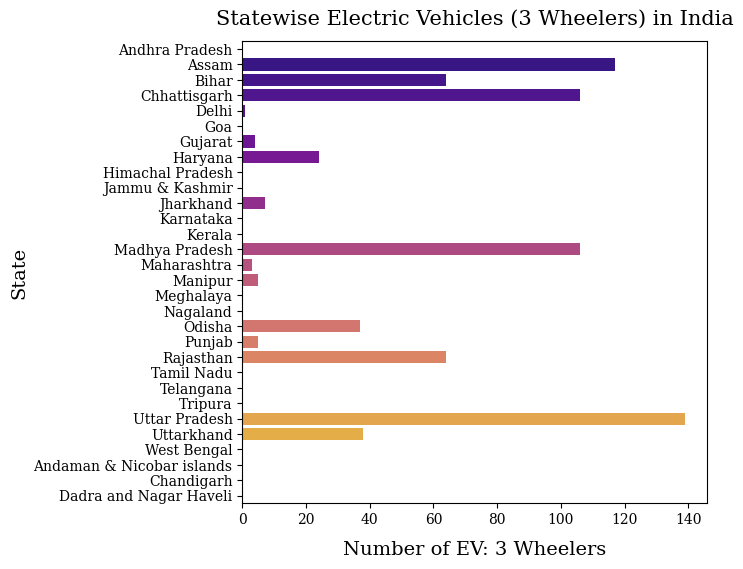

In [49]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis of 4-Wheeler EVs

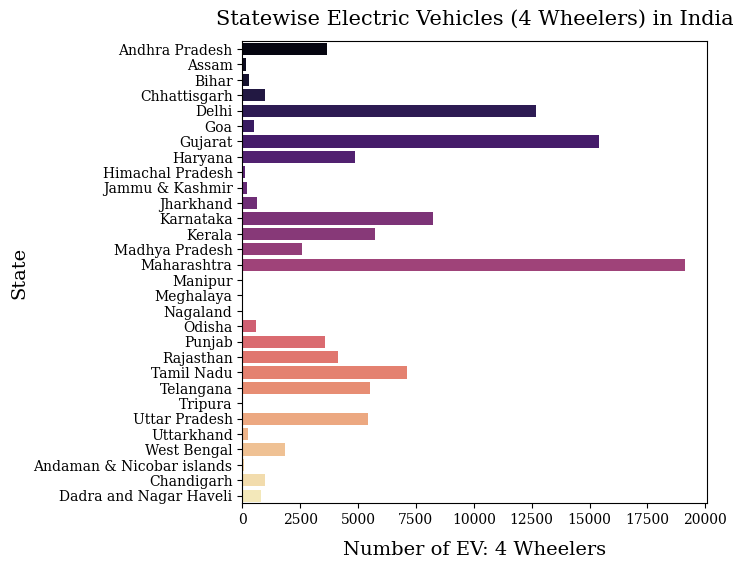

In [50]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='magma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

# Analysis of Buses

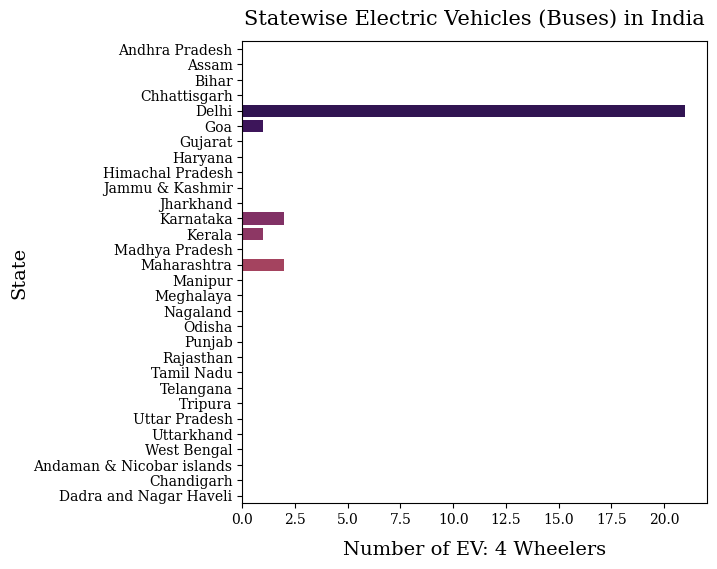

In [51]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Buses', palette='inferno')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (Buses) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

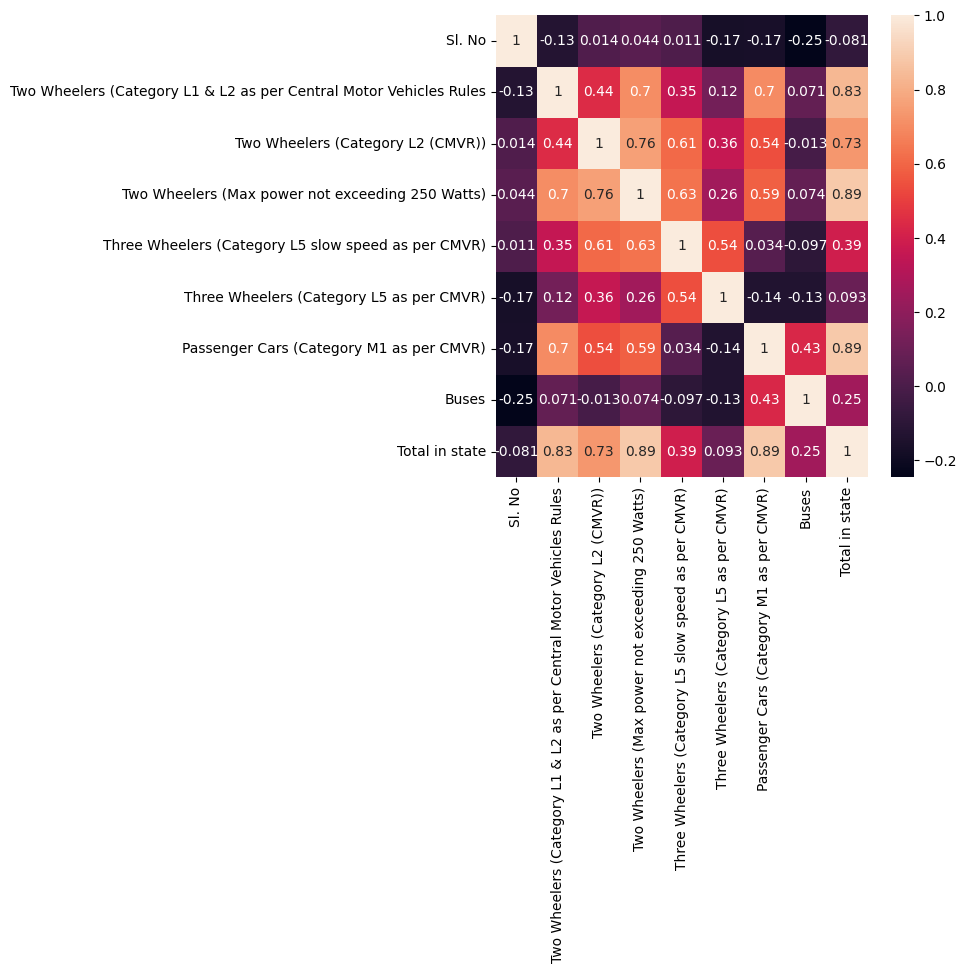

In [127]:
numerical_df1 = df1.select_dtypes(include=['float', 'int'] )
plt.figure(figsize=(6,6))
sns.heatmap(numerical_df1.corr(), annot=True)
plt.show()

**Scaling Data Frame**

In [128]:
numerical_dif1 = df1.select_dtypes(include=['float', 'int'] )
scalar = StandardScaler()
scaled_df = scalar.fit_transform(numerical_df1)

Dimensionality Reduction

In [129]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,0.020059,0.572115
1,-0.965403,-1.081791
2,-0.773003,-0.637832
3,0.032420,-1.874438
4,1.723519,4.251704


Hyperparameter Tuning

Finding 'K' value by Elbow Method

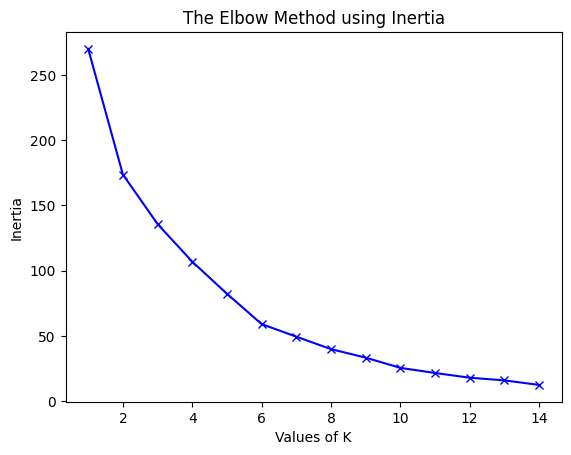

In [130]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Model Building Using KMeans

In [131]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

Visualizing the Clustered DataFrame

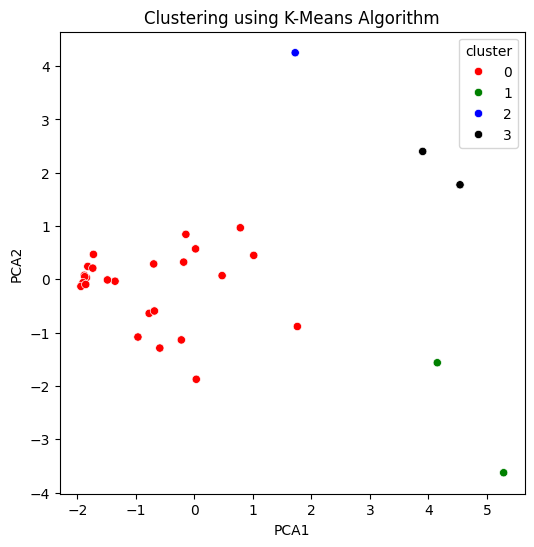

In [132]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [133]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=df1.columns[:-1])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=df1.columns[:-1])
cluster_centers.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses
0,16.2,409.04,305.8,2391.64,6.12,21.96,1921.44,0.16,5056.16
1,16.5,3058.00,1929.5,14553.50,115.00,81.50,5161.50,0.00,24899.00
2,5.0,1395.00,251.0,5018.00,0.00,1.00,12695.00,21.00,19381.00
3,11.0,4906.00,1157.0,9311.00,3.00,3.50,17258.50,1.00,32640.00


In [134]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492,0
1,2,Assam,463,138,1006,0,117,151,0,1875,0
2,3,Bihar,252,430,2148,6,64,271,0,3171,0
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234,0
4,5,Delhi,1395,251,5018,0,1,12695,21,19381,2


<Axes: xlabel='Cluster', ylabel='count'>

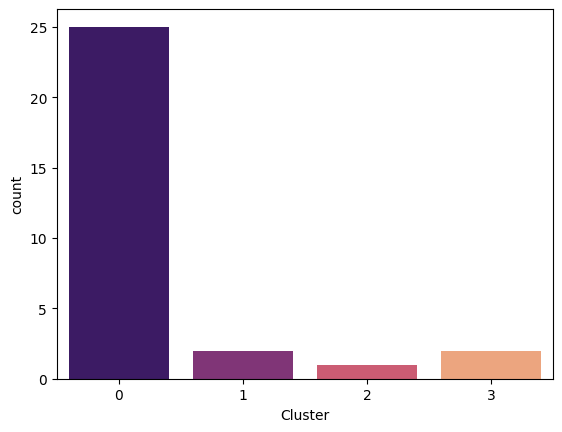

In [135]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df, palette ='magma')

# Dataset 2 Analysis

In [84]:
df2.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

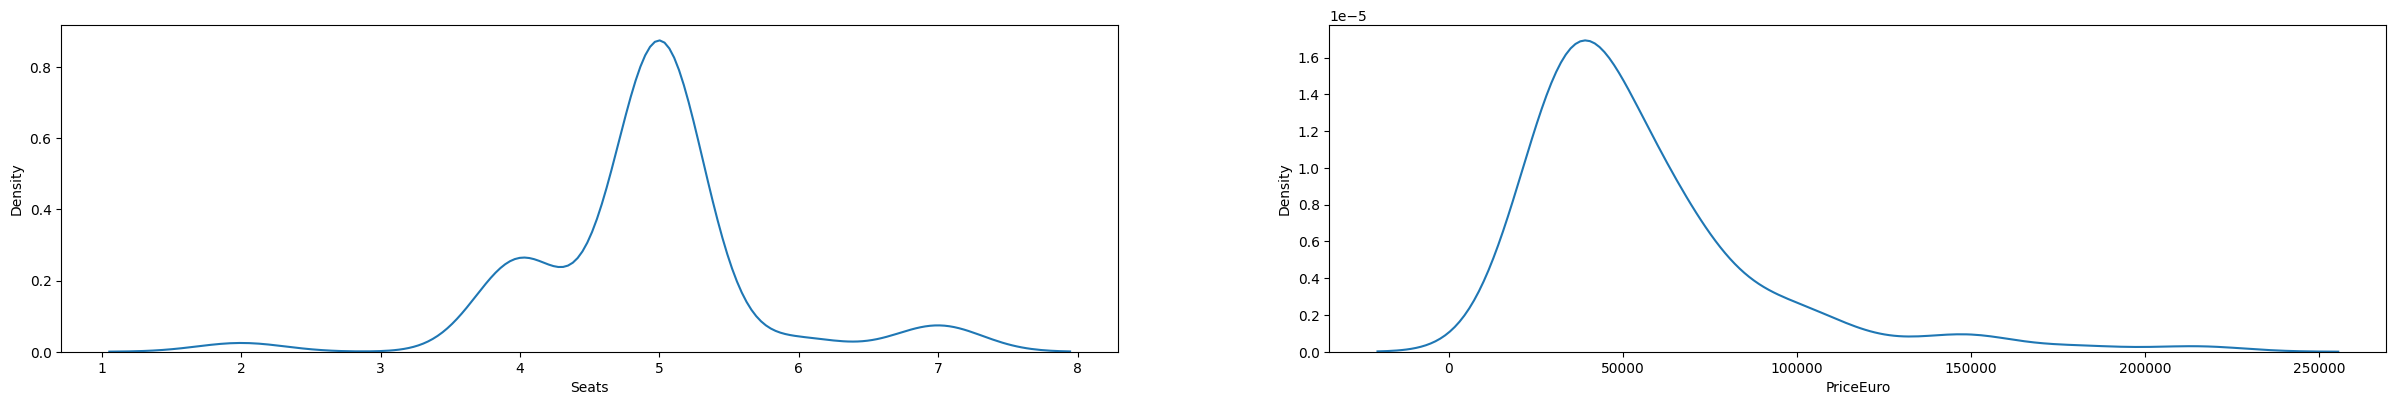

In [85]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df2.columns):
    if df2[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df2[col], ax=ax)
        plt.xlabel(col)

plt.show()

# Analysis of EVs based on Brands

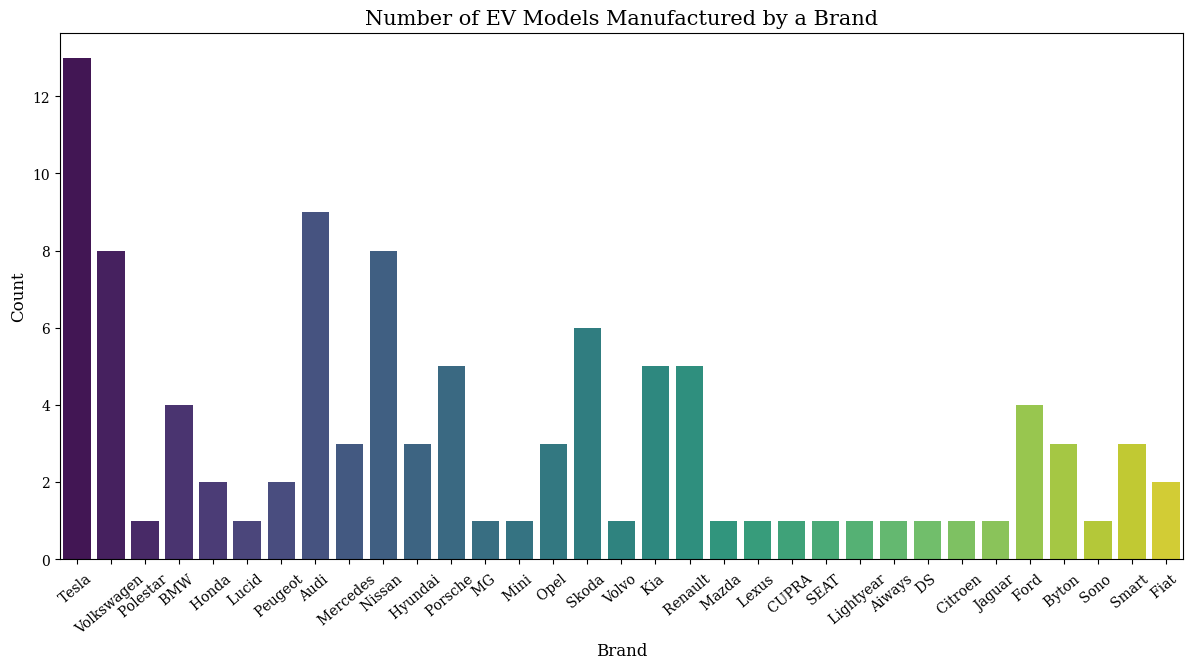

In [86]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

# Analysis of Different body types of EVs

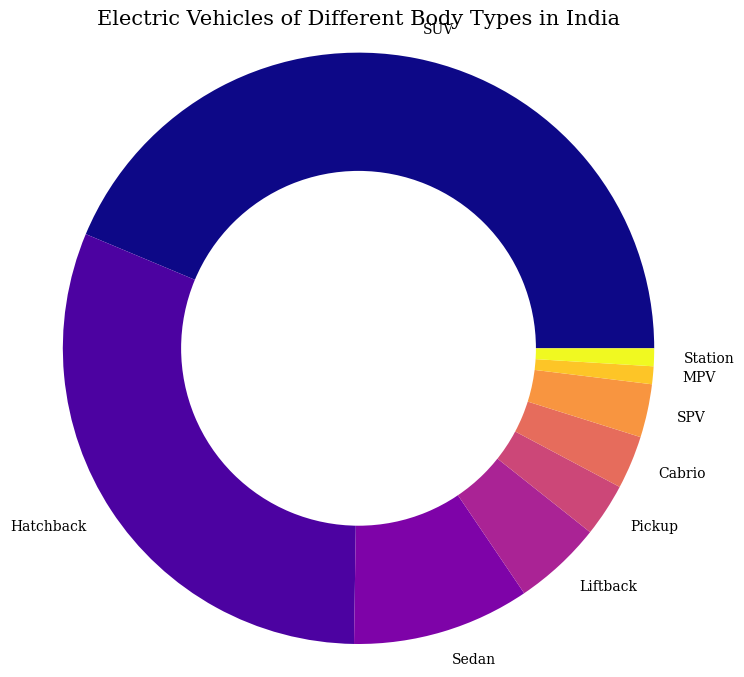

In [87]:
# different body types EVs visualization from dataset 2
x = df2['BodyStyle'].value_counts().plot.pie(radius=2, cmap='plasma', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

# Analysis of EVs of different number of seats

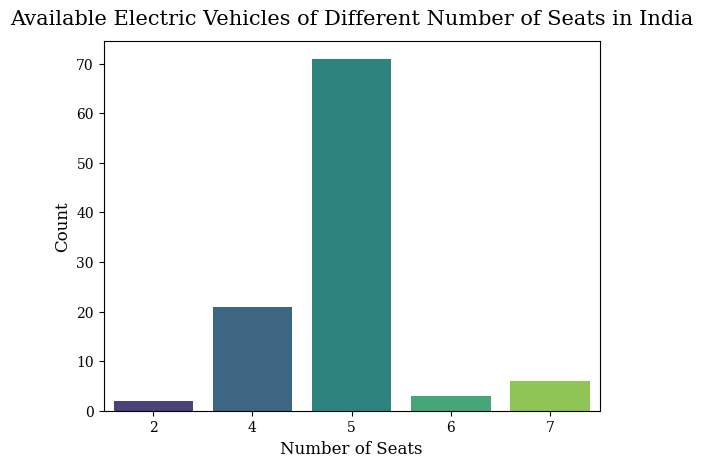

In [88]:
# EVs of different number of seats from dataset 2
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of different plug types

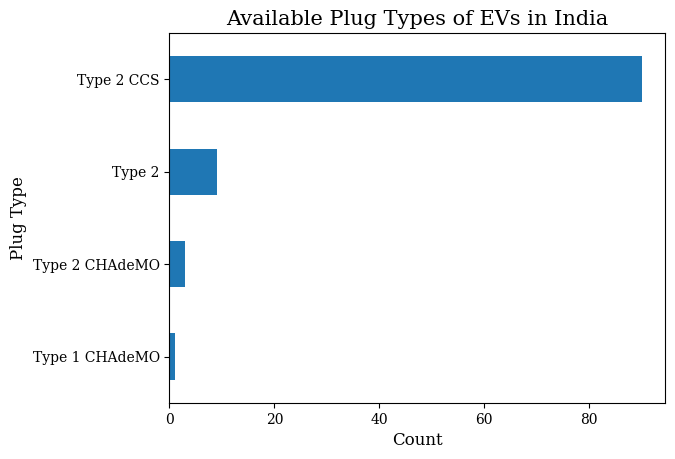

In [89]:

# plug types visualization from dataset 2
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

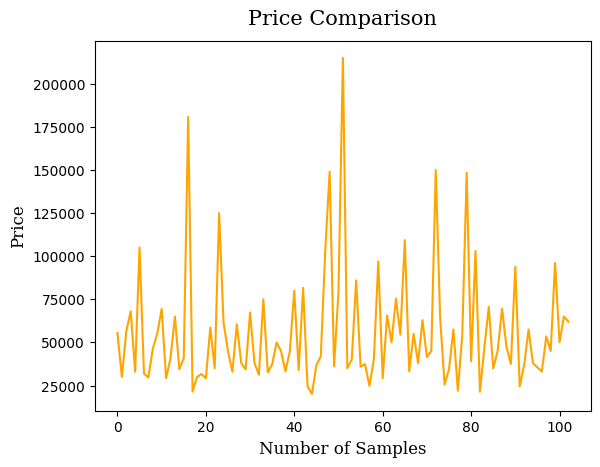

In [90]:
# plotting the price from dataset 2
plt.plot(df2['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

# Analysis of EV based on speed

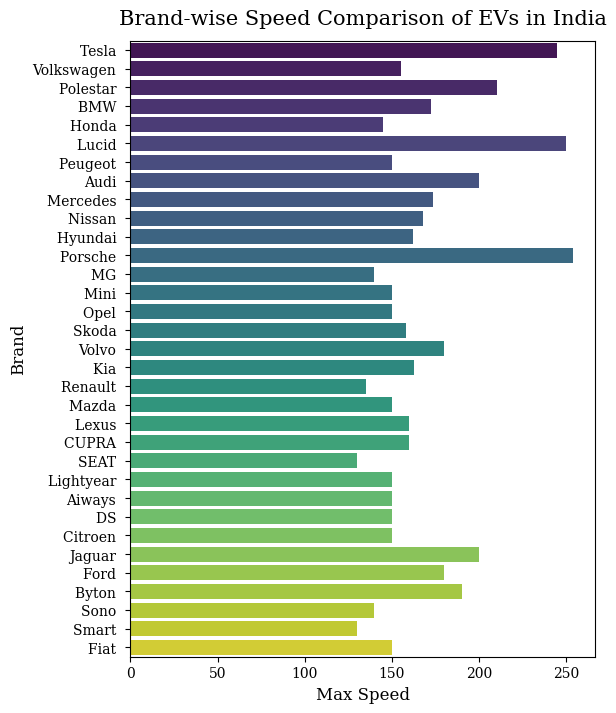

In [91]:
# speed visualization from dataset 2
import matplotlib.pyplot as plt
import seaborn as sns
if df2['TopSpeed'].dtype != 'object': # Assuming 'object' dtype for strings
    df2['TopSpeed'] = df2['TopSpeed'].astype(str)
df2['TopSpeed'] = df2['TopSpeed'].str.replace(' km/h', '').astype(int)
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, x='TopSpeed', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()


Analysis of EVs based on Range Parameter

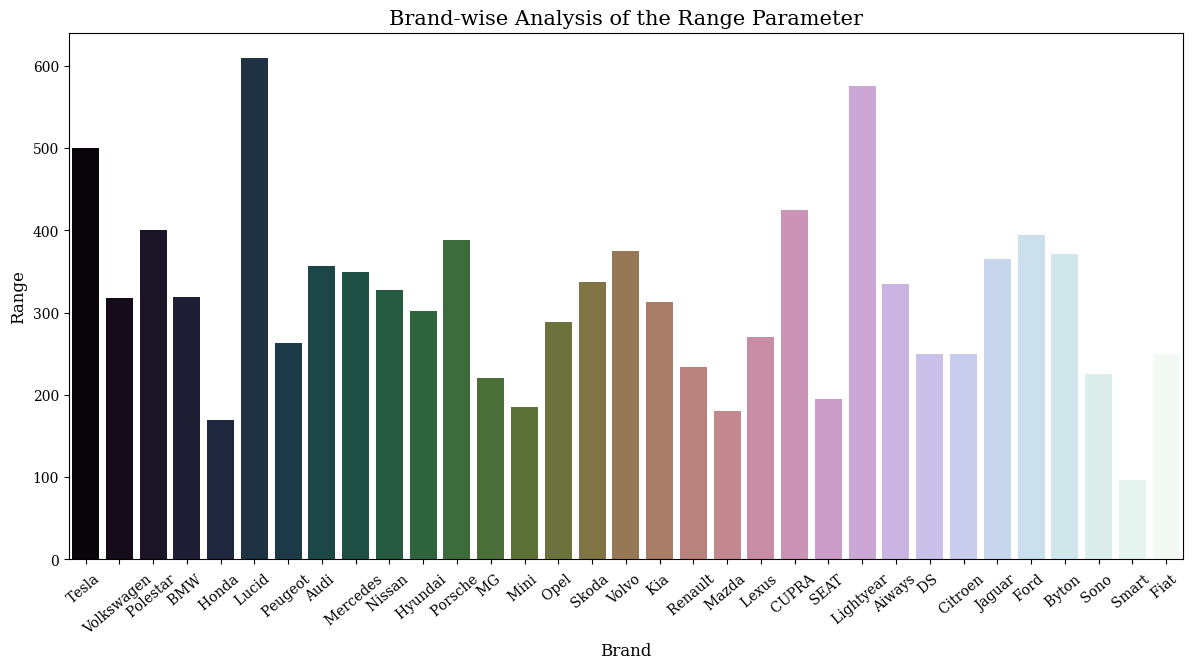

In [92]:

# brand-wise analysis of the range parameter
if df2['Range'].dtype != 'object': # Assuming 'object' dtype for strings
    df2['Range'] = df2['Range'].astype(str)
df2['Range'] = df2['Range'].str.replace(' km', '').astype(int)
sns.catplot(kind='bar', data=df2, x='Brand', y='Range', palette='cubehelix', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);

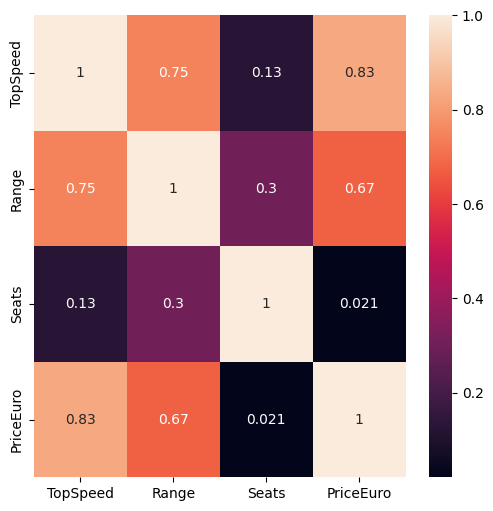

In [93]:
numerical_df2 = df2.select_dtypes(include=['float', 'int'] )
plt.figure(figsize=(6,6))
sns.heatmap(numerical_df2.corr(), annot=True)
plt.show()

In [94]:
numerical_df2 = df2.select_dtypes(include=['float', 'int'] )
scalar = StandardScaler()
scaled_df2 = scalar.fit_transform(numerical_df2)

In [95]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df2)
pca_df2 = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df2.head()

,PCA1,PCA2
0,1.242898,-0.088799
1,-0.969399,-0.329219
2,0.724481,-0.101293
3,0.332099,-0.063131
4,-1.777282,0.945422


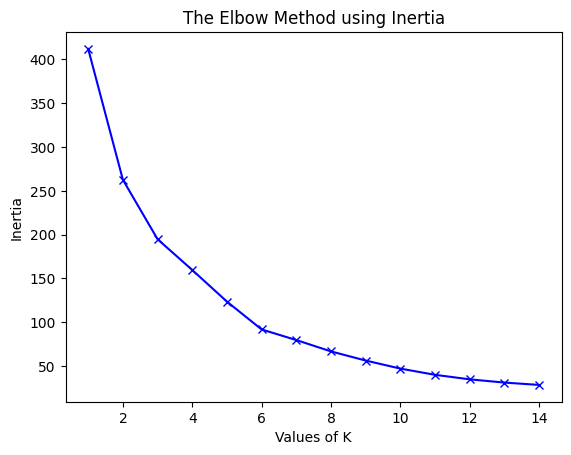

In [96]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df2))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [97]:
kmeans_model=KMeans(6)
kmeans_model.fit_predict(scaled_df2)
pca_df_kmeans= pd.concat([pca_df2,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

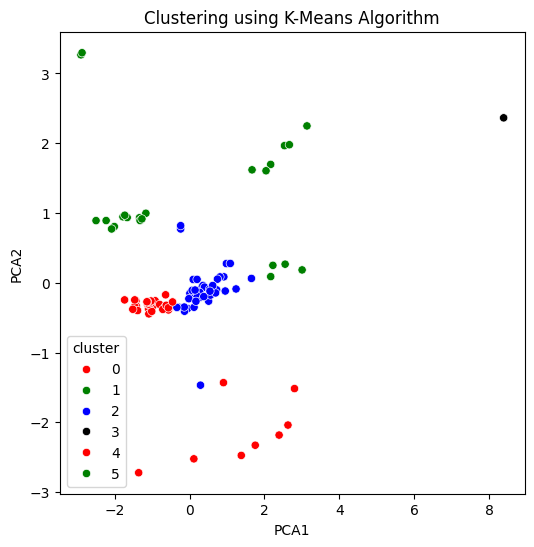

In [99]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [104]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=df2.columns[:-10])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=df2.columns[:-10])
cluster_centers

,Brand,Model,Accel,TopSpeed
0,150.193548,267.580645,5.064516,34706.870968
1,242.100000,457.000000,4.400000,124730.900000
2,187.675000,382.500000,4.975000,57118.000000
3,410.000000,970.000000,4.000000,215000.000000
4,214.000000,466.428571,6.714286,73407.285714
5,140.357143,178.214286,3.714286,29414.142857


In [105]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df2 = pd.concat([df2,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df2.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233,450,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,2
1,Volkswagen,ID.3 Pure,10.0 sec,160,270,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,0
2,Polestar,2,4.7 sec,210,400,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,2
3,BMW,iX3,6.8 sec,180,360,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,2
4,Honda,e,9.5 sec,145,170,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,5


<Axes: xlabel='Cluster', ylabel='count'>

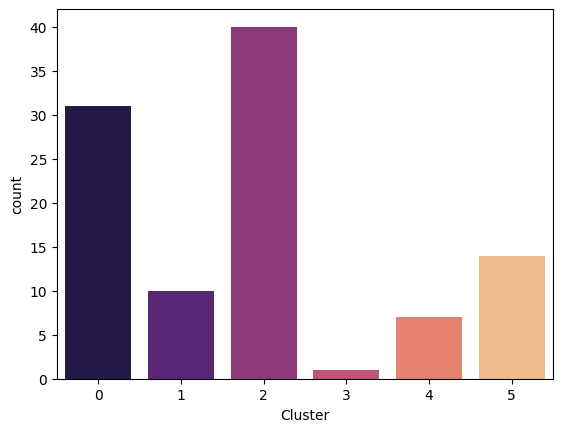

In [106]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df2, palette ='magma')

# Dataset 3 Analysis

In [107]:
df3.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

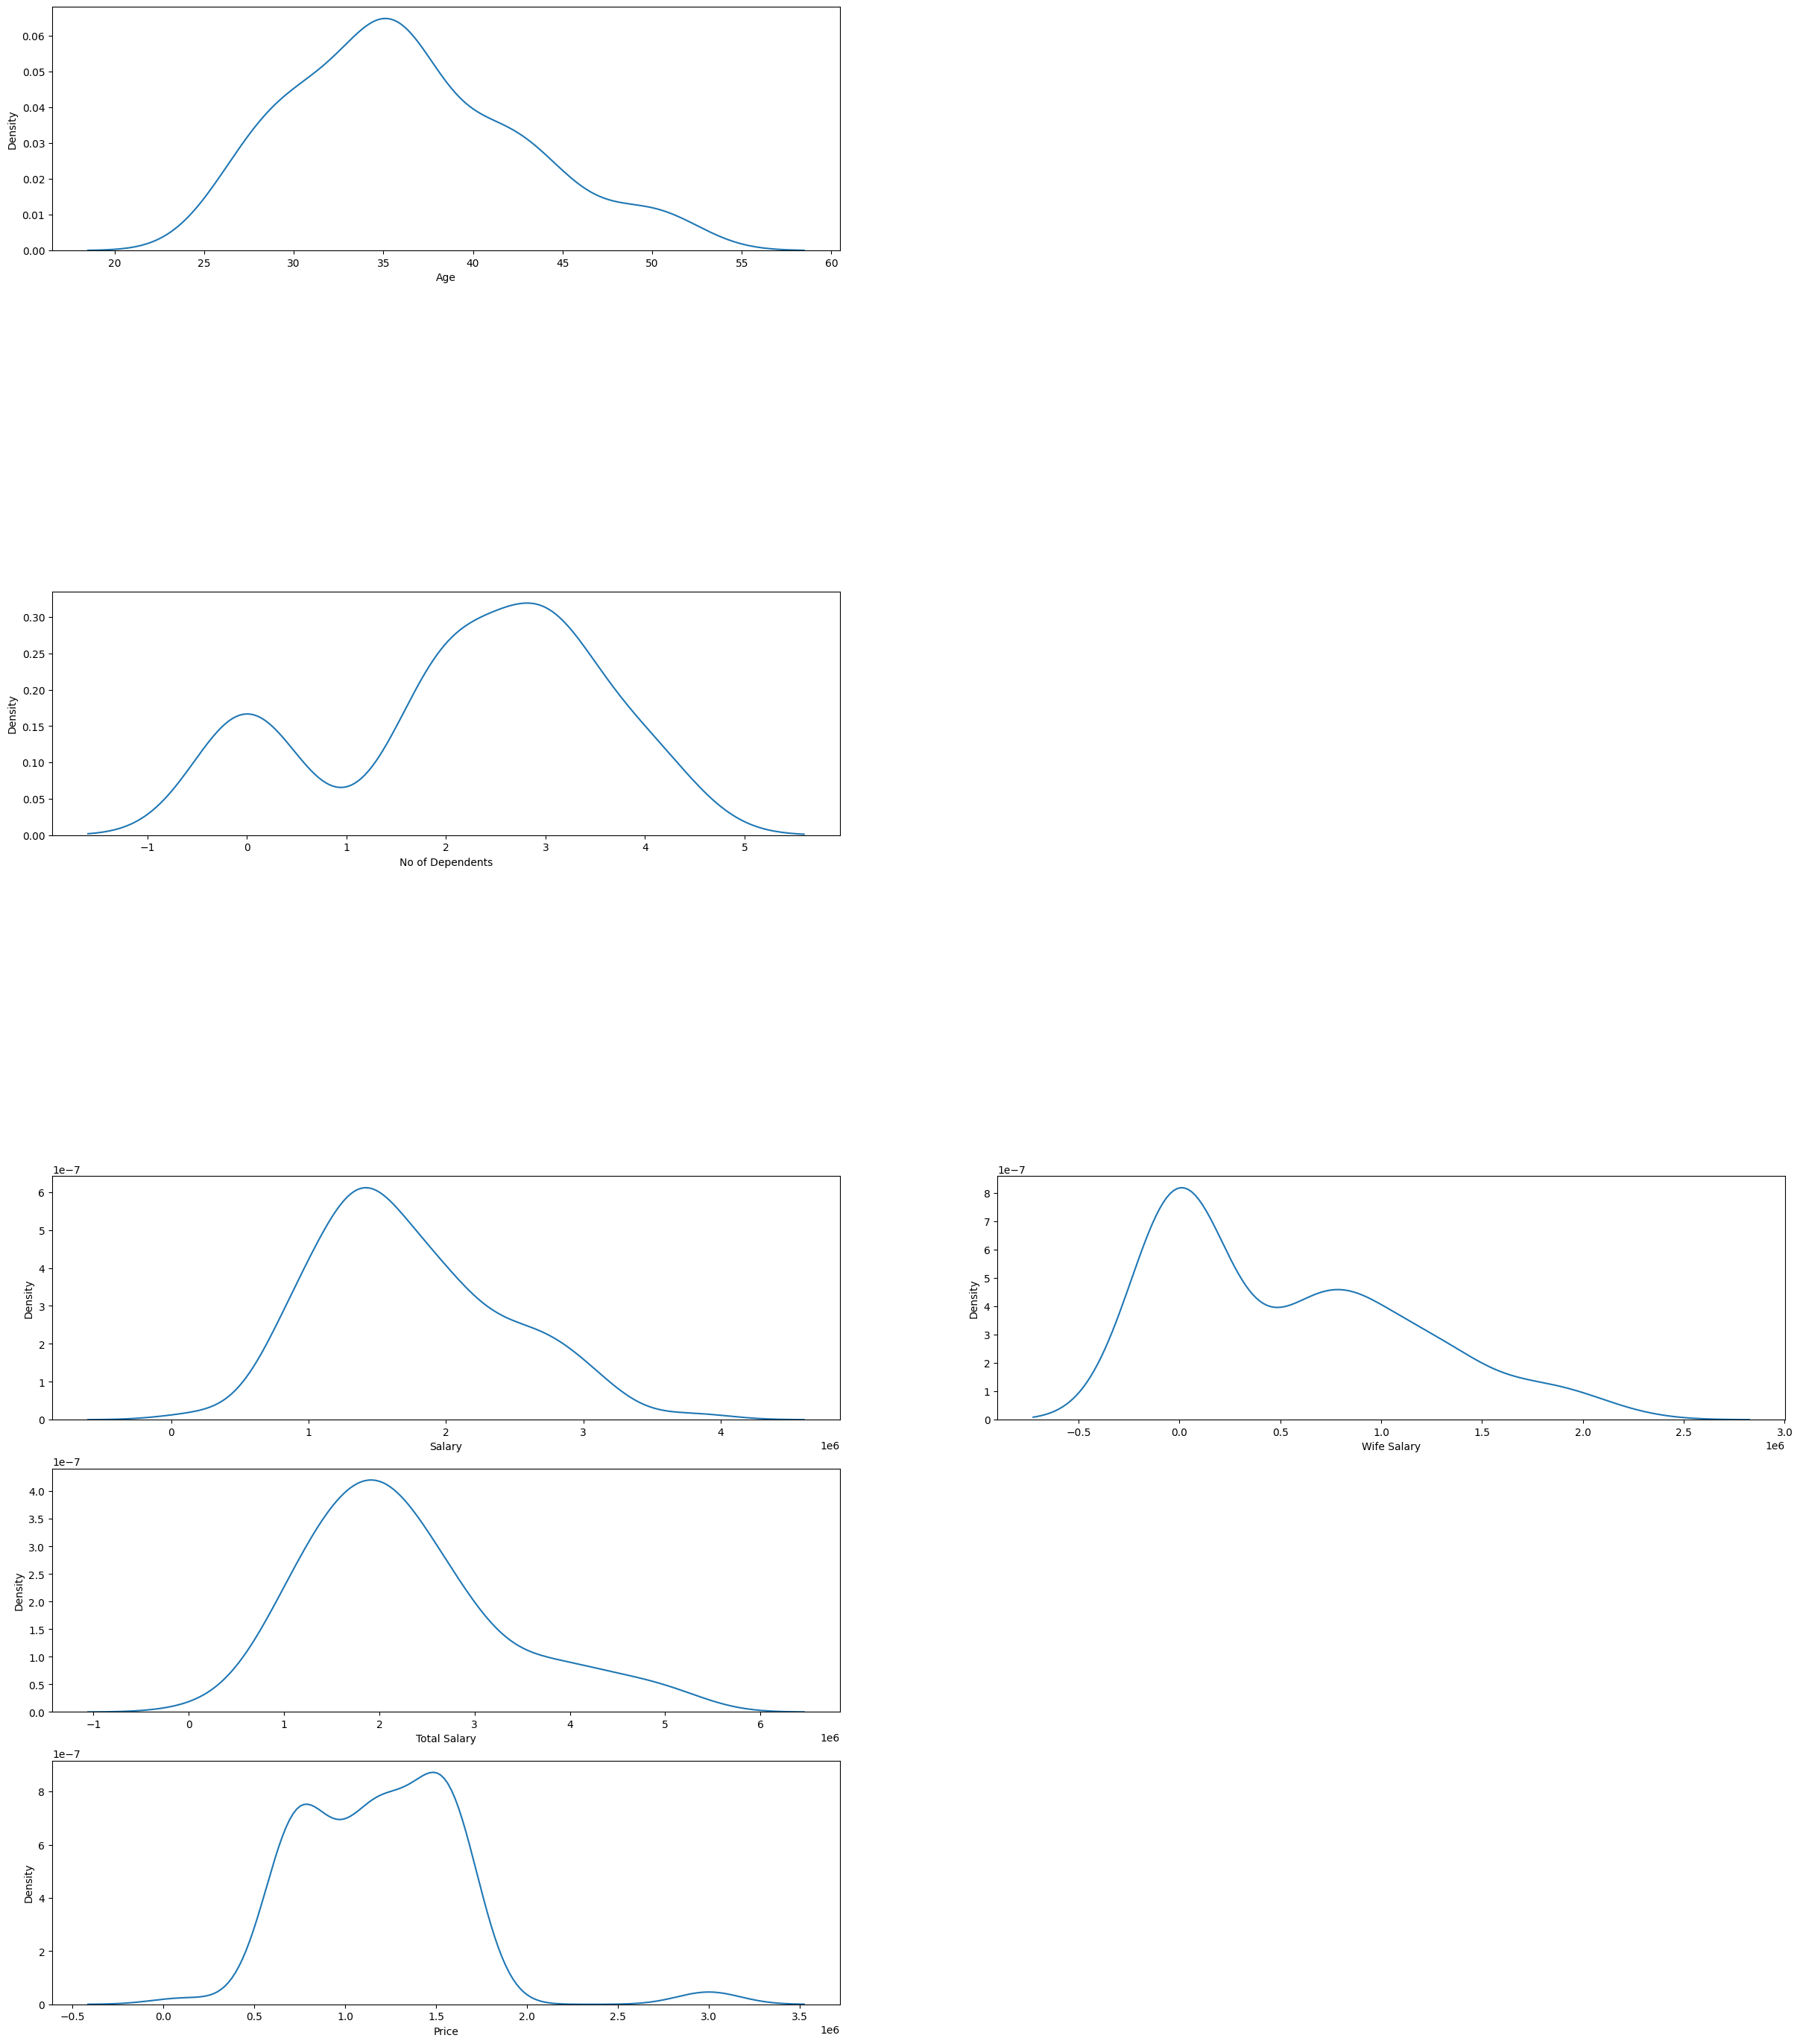

In [108]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df3.columns):
    if df3[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df3[col], ax=ax)
        plt.xlabel(col)

plt.show()

# Analysis of Age Group of Customers

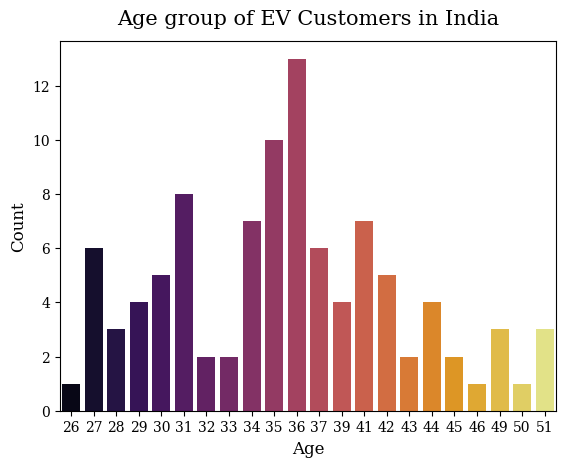

In [109]:
sns.countplot(data=df3, x='Age', palette='inferno')
plt.xlabel('Age', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Age group of EV Customers in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of Income group of Customers

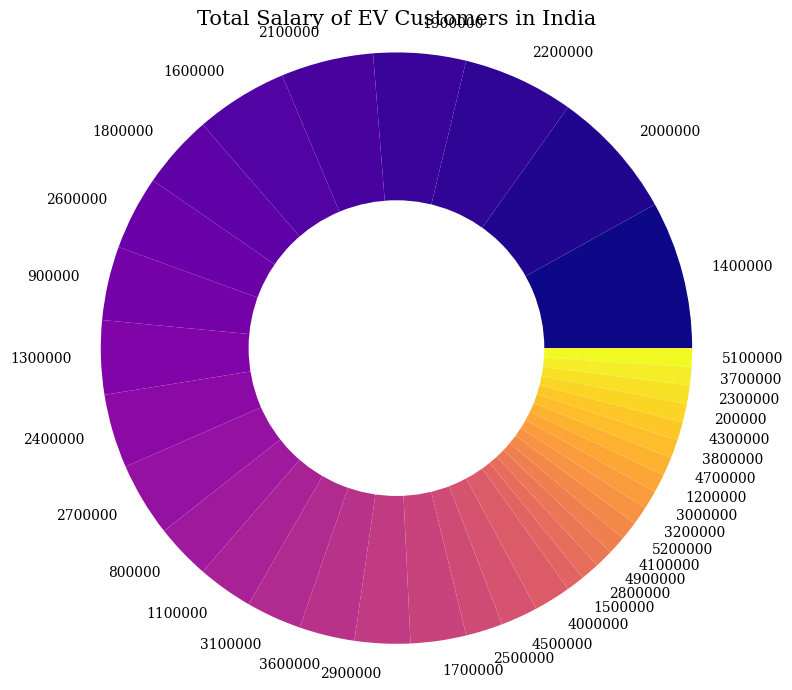

In [110]:
x = df3['Total Salary'].value_counts().plot.pie(radius=2, cmap='plasma', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Total Salary of EV Customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

# Analysis of different professionality of customers

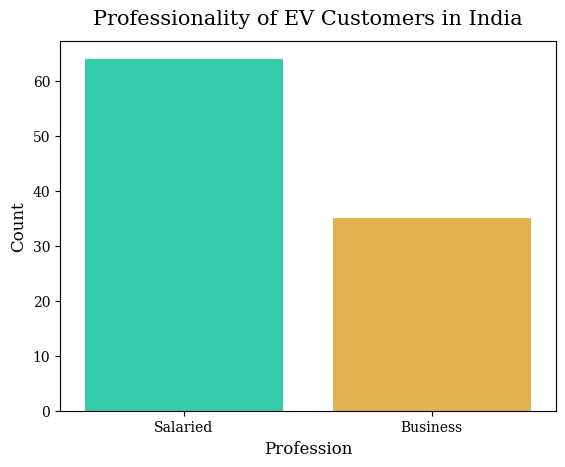

In [111]:
sns.countplot(data=df3, x='Profession', palette='turbo')
plt.xlabel('Profession', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Professionality of EV Customers in India', family='serif', size=15, pad=12)
plt.show()

# Analysis of education of customers

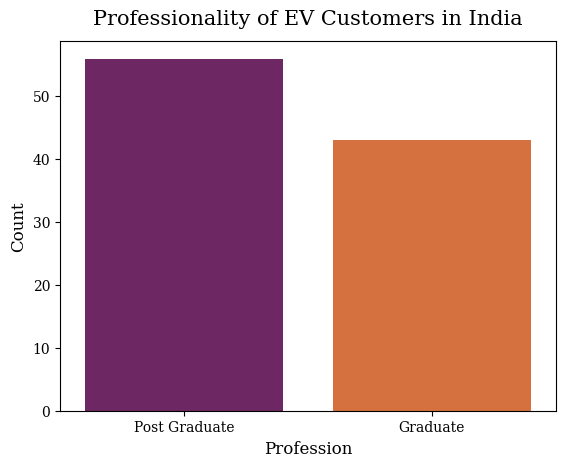

In [112]:
sns.countplot(data=df3, x='Education', palette='inferno')
plt.xlabel('Profession', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Professionality of EV Customers in India', family='serif', size=15, pad=12)
plt.show()

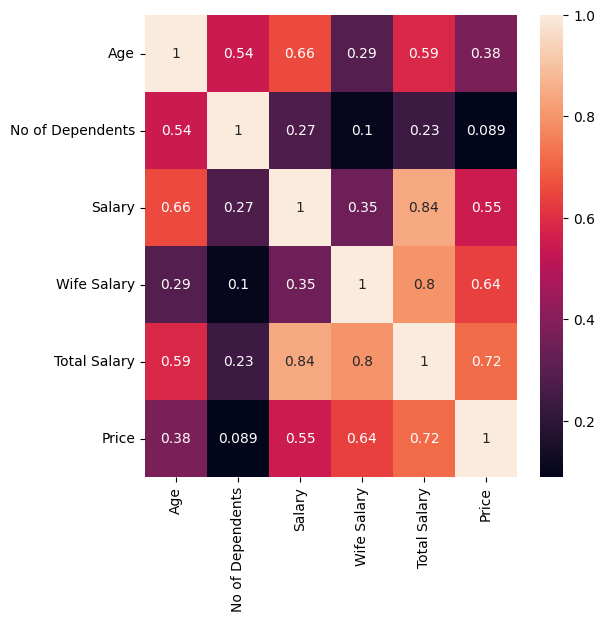

In [113]:
numerical_df3 = df3.select_dtypes(include=['float', 'int'] )
plt.figure(figsize=(6,6))
sns.heatmap(numerical_df3.corr(), annot=True)
plt.show()

In [114]:
numerical_df3 = df3.select_dtypes(include=['float', 'int'] )
scalar = StandardScaler()
scaled_df3 = scalar.fit_transform(numerical_df3)

In [115]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df3)
pca_df3 = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df3.head()

,PCA1,PCA2
0,-3.029802,-1.083697
1,-0.616329,-0.101831
2,0.322158,2.022862
3,0.355147,0.707849
4,0.396537,-1.013442


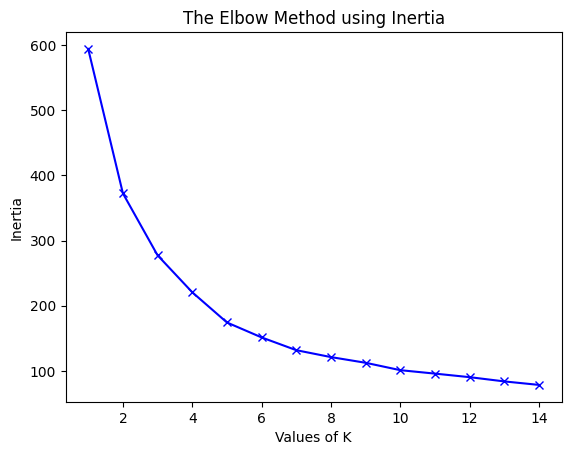

In [121]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df3))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [122]:
kmeans_model=KMeans(5)
kmeans_model.fit_predict(scaled_df3)
pca_df_kmeans= pd.concat([pca_df3,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

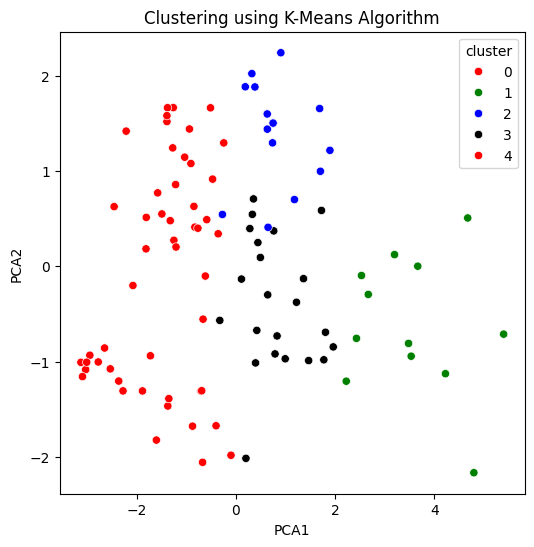

In [123]:
plt.figure(figsize=(6,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [124]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=df3.columns[:-7])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=df3.columns[:-7])
cluster_centers

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan
0,34.535714,2.964286,1.357143e+06,2.142857e+05,1.571429e+06,8.357143e+05
1,43.666667,2.583333,2.758333e+06,1.641667e+06,4.400000e+06,1.800000e+06
2,43.800000,2.933333,2.440000e+06,-1.164153e-10,2.440000e+06,1.193333e+06
3,36.590909,2.545455,1.700000e+06,1.004545e+06,2.704545e+06,1.454545e+06
4,29.181818,0.090909,1.218182e+06,2.318182e+05,1.450000e+06,1.059545e+06


In [125]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df3= pd.concat([df3,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df3.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,4
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3


<Axes: xlabel='Cluster', ylabel='count'>

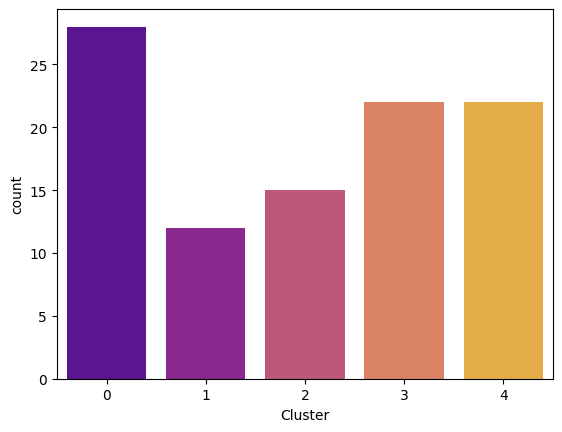

In [126]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df3, palette ='plasma')